In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('datasets/train.csv', index_col='PassengerId')
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isna().mean()*100

In [ ]:
# Remove passengersId, Name, Ticket and Cabin
titanic = df.reset_index()
removed_col = ['PassengerId', 'Name', 'Cabin', 'Ticket']
titanic = titanic.drop(removed_col, axis=1)

# fill Age with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# fill Embarked with mode
embarked_mode = titanic['Embarked'].mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(embarked_mode)
titanic.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

# Label econde sex col
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])


# Onehot encode Embarked col
ohe = OneHotEncoder(drop='first', sparse_output=False)
embarked_encoded = ohe.fit_transform(X[['Embarked']])
embarked_df = pd.DataFrame(embarked_encoded, columns=ohe.get_feature_names_out(['Embarked']))
X = pd.concat([X.drop(['Embarked'], axis=1).reset_index(drop=True), embarked_df.reset_index(drop=True)], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#split into test train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:

test_df = pd.read_csv('./datasets/test.csv')
test = test_df.drop(removed_col, axis=1)
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0]) 
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test

In [ ]:
le = LabelEncoder()
test['Sex'] = le.fit_transform(test['Sex'])
ohe = OneHotEncoder(drop='first', sparse_output=False)
embarked_test_df = ohe.fit_transform(test[['Embarked']])
embarked_df = pd.DataFrame(embarked_test_df, columns=ohe.get_feature_names_out(['Embarked']))
final = pd.concat([test.drop(['Embarked'], axis=1).reset_index(drop=True), embarked_df.reset_index(drop=True)], axis=1)
final

In [ ]:
test_pred = model.predict(final)

In [ ]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_pred})
submission.to_csv('submission.csv', index=False)

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/Users/arifbillah/.kaggle"
!kaggle competitions submit -c titanic -f submission.csv -m "Logistic Regression Submission"



In [ ]:
!kaggle competitions submissions -c titanic

In [141]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


print("Accuracy Score", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy Score 0.7877094972067039
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[86 19]
 [19 55]]


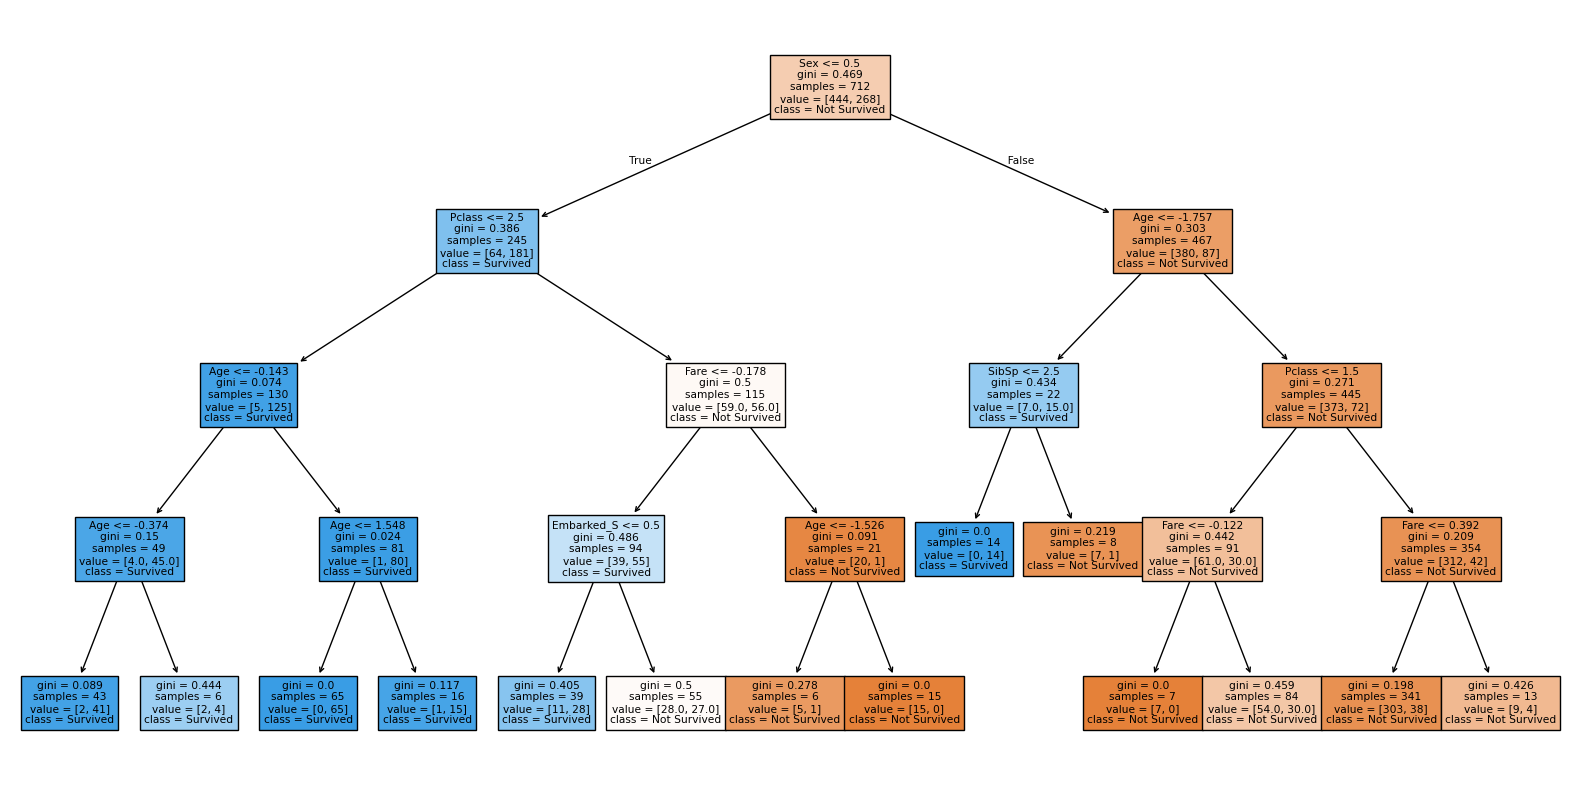

In [138]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


In [148]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy Score", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy Score 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Confusion Matrix:
 [[90 15]
 [18 56]]


In [ ]:
test_pred_rf = rf.predict(final)
test_pred_dt = dt_model.predict(final)

submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_pred_dt})
submission.to_csv('dt.csv', index=False)
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/Users/arifbillah/.kaggle"
!kaggle competitions submit -c titanic -f dt.csv -m "Decisoin Tree Submission"



100%|██████████████████████████████████████| 2.77k/2.77k [00:01<00:00, 2.50kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [152]:
!kaggle competitions submissions -c titanic

fileName        date                 description                     status    publicScore  privateScore  
--------------  -------------------  ------------------------------  --------  -----------  ------------  
dt.csv          2025-03-25 22:32:24  Random Forest Submission        complete  0.71531                    
rf.csv          2025-03-25 22:29:38  Logistic Regression Submission  complete  0.60765                    
rf.csv          2025-03-25 22:26:40  Logistic Regression Submission  complete  0.59808                    
rf.csv          2025-03-25 22:24:20  Logistic Regression Submission  complete  0.76315                    
submission.csv  2025-03-25 22:05:17  Logistic Regression Submission  complete  0.76315                    
lr.csv          2025-03-25 22:02:59  Logistic Regression Submission  complete  0.76315                    
lr.csv          2025-03-25 21:38:34  Logistic Regression Submission  complete  0.76315                    
submission.csv  2025-03-25 21:34:34  